In [11]:
import yfinance

In [3]:
ASSET_SYMBOL = "BTC-USD"
START_DATE = "2022-03-14"
END_DATE = "2022-08-15"
dataframe = yfinance.download(tickers = ASSET_SYMBOL,
                 start = START_DATE,
                 end = END_DATE)

dataframe

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-13,38884.726562,39209.351562,37728.144531,37849.664062,37849.664062,17300745310
2022-03-14,37846.316406,39742.500000,37680.734375,39666.753906,39666.753906,24322159070
2022-03-15,39664.250000,39794.628906,38310.210938,39338.785156,39338.785156,23934000868
2022-03-16,39335.570312,41465.453125,39022.347656,41143.929688,41143.929688,39616916192
2022-03-17,41140.843750,41287.535156,40662.871094,40951.378906,40951.378906,22009601093
...,...,...,...,...,...,...
2022-08-09,23811.484375,23898.615234,22982.000000,23164.318359,23164.318359,23555719219
2022-08-10,23162.898438,24127.414062,22771.519531,23947.642578,23947.642578,32837431722
2022-08-11,23948.345703,24822.628906,23900.996094,23957.529297,23957.529297,37127036580


In [4]:
# STOCK_SYMBOL = "BTC-USD"
# PERIOD = "1d"
# INTERVAL = "1d"
# dataframe = yfinance.download(tickers = STOCK_SYMBOL,
#                  period = PERIOD,
#                  interval= INTERVAL)

# dataframe

<AxesSubplot:xlabel='Date'>

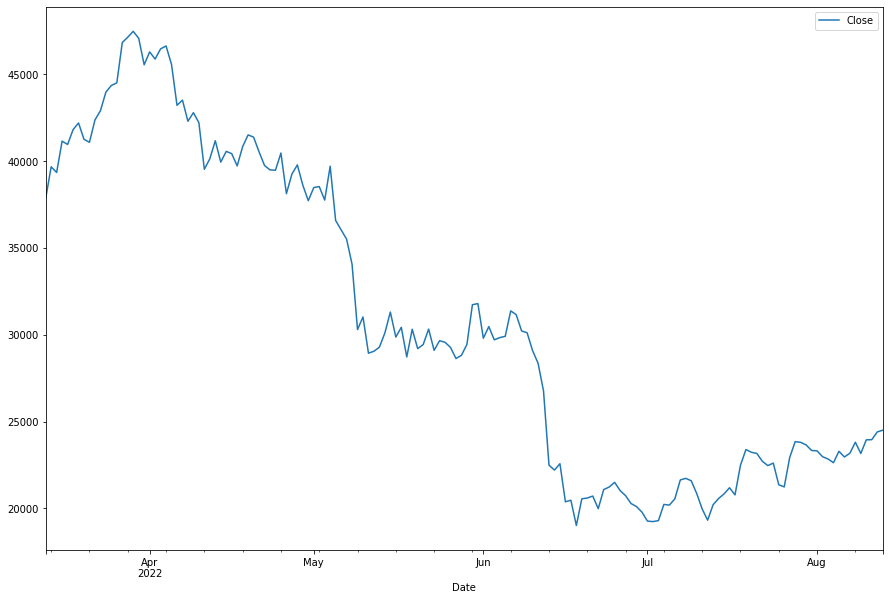

In [5]:
import pandas
dataframe["Date"] = pandas.to_datetime(dataframe.index)

plot_dataframe = dataframe[["Date","Close"]].set_index("Date")
plot_dataframe.plot.line(figsize= (15,10))

In [6]:
import tweepy

In [7]:
from tweepy import OAuth1UserHandler

In [8]:
consumer_key = "Enter your tweepy consumer key"
consumer_secret = "Enter your tweepy consumer secret"
access_key = "Enter your tweepy access key"
access_secret = "Enter your tweepy access secret"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
try:
    username = "elonmusk"
    NUMBER_OF_TWEETS =300
    all_tweets = []
    tweets = api.user_timeline(screen_name = username,
                     count = NUMBER_OF_TWEETS)
    all_tweets.extend(tweets)
#     print(all_tweets)
    
    oldest_index = len(all_tweets) - 1
    oldest = all_tweets[oldest_index].id -1
    
    i = 300
    while i > 0:
        i = i-30
        
        new_tweets =   api.user_timeline(screen_name = username,
                     count = NUMBER_OF_TWEETS,
                     max_id = oldest)
        
        all_tweets.extend(new_tweets)
        
        oldest = all_tweets[-1].id -1
        
        tweets_list = [[tweet.created_at,
                       tweet.id,
                       tweet.text] for tweet in all_tweets]
        
        
        
        
    
except BaseException as e:
    print(str(e))
    time.sleep(3)
    
# print(tweets_list)
tweets_dataframe = pandas.DataFrame(tweets_list)   
tweets_dataframe
    

,0,1,2
0,2022-08-13 04:39:30+00:00,1558312265589432323,@DBurkland @WholeMarsBlog 8/20
1,2022-08-13 04:38:54+00:00,1558312112514076674,@WholeMarsBlog 10.69 is 🔥🔥
2,2022-08-13 04:26:20+00:00,1558308952798019585,Ahem @twitter https://t.co/LCDpOeIei5
3,2022-08-13 04:23:12+00:00,1558308163253854208,@techAU @wintonARK Would be pretty wild if a “...
4,2022-08-13 04:21:47+00:00,1558307805710499843,@techAU @wintonARK We’ll phase in Dojo. Won’t ...
...,...,...,...
2195,2022-02-06 18:23:50+00:00,1490390796935340039,@TeslaNY @live_munro Munro understands
2196,2022-02-06 01:38:11+00:00,1490137716377411588,[Satire]
2197,2022-02-06 01:37:28+00:00,1490137536806727683,🚬 Thank You for Smoking 🚬
2198,2022-02-06 00:27:58+00:00,1490120045028122624,Tesla Model S &amp; X Plaid are so fun! https:...


In [10]:
# tweets_list[2][2]
from textblob import TextBlob

keywords = ["btc",
           "bitcoin"]

count = 0
positive_count = 0
negative_count = 0
avg_sentiment = 0
negative_avg_sentiment = 0
positive_avg_sentiment = 0
total_polarity = 0
negative_total_polarity = 0 
positive_total_polarity = 0
checked_tweets = 0


for tweet in tweets_list:
    
     if any (keyword in tweet[2].lower() for keyword in keywords):
        print("The tweet was about: ", keywords)
        
        checked_tweets = checked_tweets + 1
        tweet_blob = TextBlob(tweet[2].lower())
        total_polarity = total_polarity + tweet_blob.sentiment.polarity
        
        if(tweet_blob.sentiment.polarity > 0):
            count = count + 1
            positive_count = positive_count+1
            positive_total_polarity = positive_total_polarity + tweet_blob.sentiment.polarity
            positive_avg_sentiment = positive_total_polarity/positive_count
      
            
                    
        if(tweet_blob.sentiment.polarity<0) :
                    count = count + 1
                    negative_count = negative_count+1
                    negative_total_polarity = negative_total_polarity + tweet_blob.sentiment.polarity
                    negative_avg_sentiment = negative_total_polarity/negative_count
         
        if (count !=0):
            avg_sentiment = total_polarity/count
            
        print("DATE: ", tweet[0])
        print("TWEET: ", tweet[2]) 
        print("POLARITY:", tweet_blob.sentiment.polarity)
        print("____________________________________________________")
        
print ("Details of keyword ", keywords )
print ("Average sentiment of ", checked_tweets, " tweets is:", avg_sentiment)
print ("Total count of Negative Sentiments: ", 
                   negative_count, " Having Average Negative Sentiment: ",negative_avg_sentiment)
print ("Total count of Positive Sentiments: ", 
                   positive_count, " Having Average Positive Sentiment: ",positive_avg_sentiment)        

#         analyze_sentiment()
#     else:
#         print("The tweet was NOT about eth.")
#         analyze_sentiment()
        
# trading_bot()    

The tweet was about:  ['btc', 'bitcoin']
DATE:  2022-07-02 01:57:19+00:00
TWEET:  @BitcoinStripper Talulah designed that dress herself and much of my 40th birthday party. She is a party genius. ♥️
POLARITY: 0.2
____________________________________________________
The tweet was about:  ['btc', 'bitcoin']
DATE:  2022-05-01 06:51:38+00:00
TWEET:  @pmarca Haha he says “Bitcoin” so many times
POLARITY: 0.35
____________________________________________________
The tweet was about:  ['btc', 'bitcoin']
DATE:  2022-03-14 08:41:28+00:00
TWEET:  @BTC_Archive 🤣
POLARITY: 0.0
____________________________________________________
Details of keyword  ['btc', 'bitcoin']
Average sentiment of  3  tweets is: 0.275
Total count of Negative Sentiments:  0  Having Average Negative Sentiment:  0
Total count of Positive Sentiments:  2  Having Average Positive Sentiment:  0.275


In [90]:
TWEET_INDEX = 2

keyword = "bitcoin"
           

stock_tweets = tweets_dataframe.loc[tweets_dataframe[TWEET_INDEX].str.lower().str.contains(keyword, regex = False)]
display(stock_tweets)


,0,1,2
409,2022-07-02 01:57:19+00:00,1543051160935874561,@BitcoinStripper Talulah designed that dress h...
1349,2022-05-01 06:51:38+00:00,1520657179908448258,@pmarca Haha he says “Bitcoin” so many times


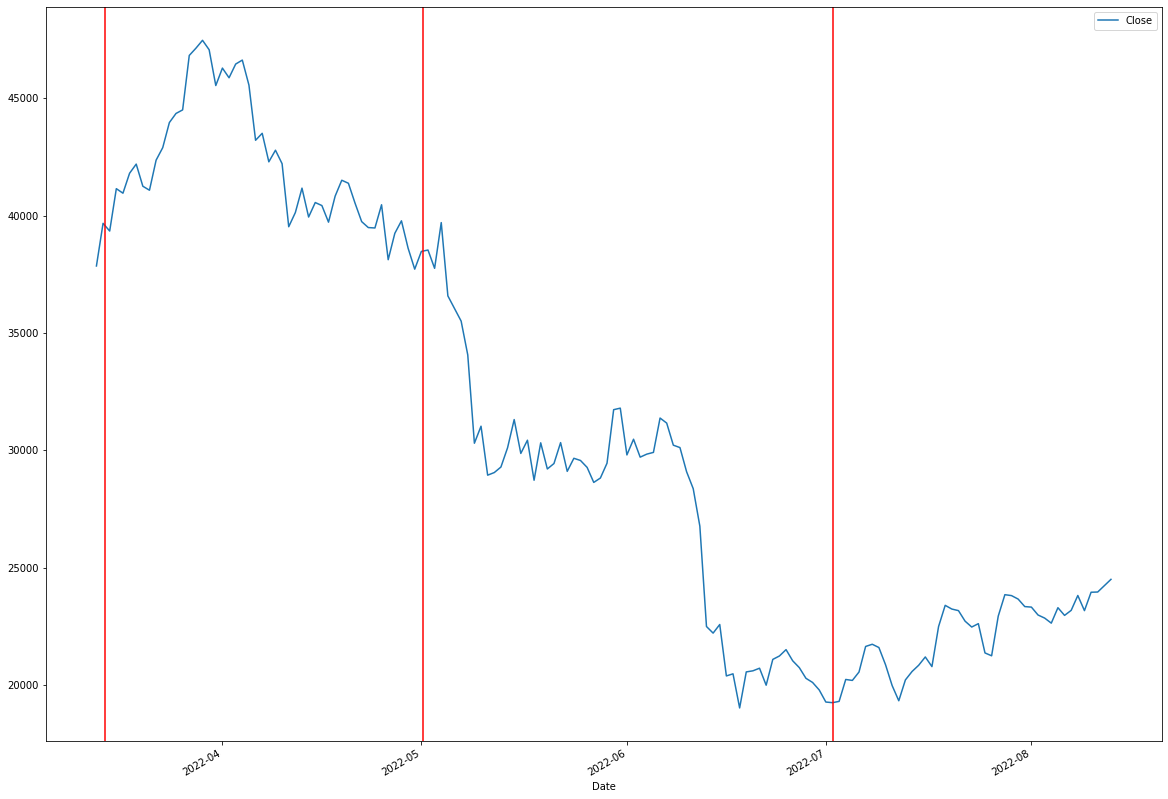

In [91]:
plot_dataframe = dataframe[["Date", "Close"]].set_index("Date")
plot_dataframe.plot.line(figsize = (20,15))

keywords = ["bitcoin",
           "btc"]


import matplotlib.pyplot as pyplot
DATE_INDEX = 0
for keyword in keywords:
    stock_tweets = tweets_dataframe.loc[tweets_dataframe[TWEET_INDEX].str.lower().str.contains(keyword, regex = False)]
    stock_dates = stock_tweets[DATE_INDEX].to_list()
    for date in stock_dates:
        pyplot.axvline(x = date, color = "red")
    
        
